# 1.Objectives

In [351]:
# Matias Säilä, Helsinki Metropolia University of Applied Sciences
# Cognitive Systems for Health Technology Applications
# The object  is to  create and train a dense neural network to predict the presence of heart disease
# Edited 7.2.2018


# 2. Required libraries   
Importing the required libraries

In [352]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

# 3. Data description and preprocessing

In [353]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
filename4 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
colnames = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# read data to data frame
df1 = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')

df2 = pd.read_csv(filename2, 
                 names = colnames, 
                 na_values = '?')

df3 = pd.read_csv(filename3, 
                 names = colnames, 
                 na_values = '?')

df4 = pd.read_csv(filename4, 
                 names = colnames, 
                 na_values = '?')
df1.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [354]:
frames = [df1,df2,df3,df4]

df = pd.concat(frames)
df.index = range(920)


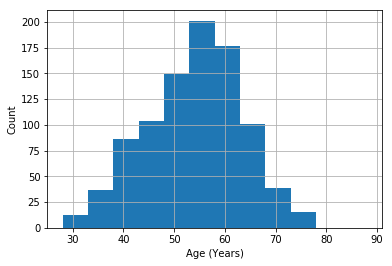

In [355]:
#Ikäjakauma

df['age'].hist(bins = np.arange(28, 90, 5))
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

In [356]:
#Missing values
df = df.where(~np.isnan(df), df.mode(), axis = 'columns')

label = (df['num'] > 0).values

In [357]:
#Data normalization

df = (df - df.min())/(df.max() - df.min())
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.725,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.75,0.00
1,0.795918,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.00,0.50
2,0.795918,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.00,0.25
3,0.183673,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.00,0.00
4,0.265306,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.00,0.00


In [358]:
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal']
data = df[columns].values

In [359]:
ndata = 920



ntrain= int(0.8*ndata) #80 testing, 10 training
train_data = data[:ntrain]
train_labels = label[:ntrain]
test_data = data[ntrain:]
test_labels = label[ntrain:]

# 4. Modeling and compilation   
Modeling and compilating the network

In [360]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(6, activation = 'relu' , input_shape=(13, )))
network.add(layers.Dense(6, activation = 'relu'))
network.add(layers.Dense(1, activation = 'relu')) # output 0 ja 1

In [361]:
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(label, num_classes=None)

In [362]:
network.compile(optimizer ='rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy']) 

# 5. Training and Validation   
Training the network with fit method. 120 epochs and batch size 128

In [363]:
N = 120

h = network.fit(train_data, train_labels, verbose = 0, epochs = 120, batch_size = 128, validation_data=(test_data, test_labels))

# 6. Evaluation   
Evaluate the network with network.evaluate. Testing the losses and the accuracy

In [364]:

test_loss, test_acc = network.evaluate(test_data, test_labels, batch_size = 128)
print('test_accuracy', test_acc)

184/184 [==============================] - 0s 43us/step
test_accuracy 0.733695654765


# 7. Results   
Movin the results to accuracy plot

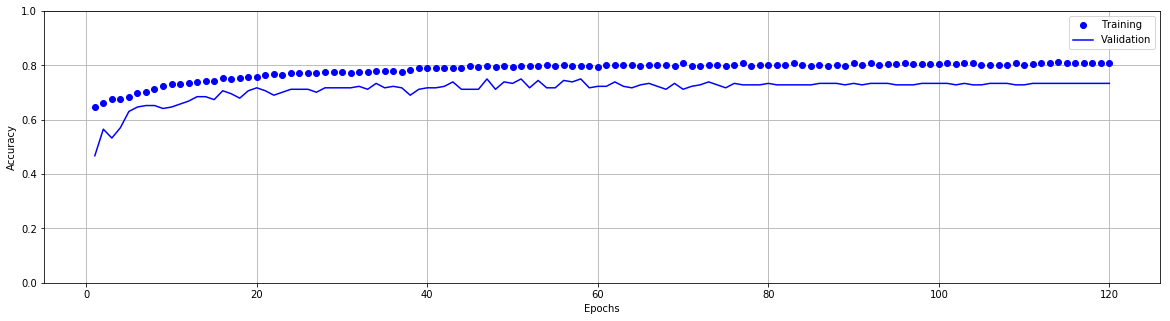

In [365]:

# Plot the results

epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()




# 8. Conclusions   
The accuracy was pretty bad. I tested with many different combinations and these were one of the best results. The accuracy gets stable after 80 epochs and after that it looks pretty stable. I wouldnt trust this results because the accuracy doesnt even go to 80%